In [1]:
import urllib.request 
import os
import tarfile
url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath="data/aclImdb_v1.tar.gz"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('download: ', result)

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import re
def rm_tags(text):
    re_tag=re.compile(r'<[^>]+>')
    return re_tag.sub('', text)

In [3]:
import os
def read_files(filetype):
    path='data/aclImdb/'
    file_list=[]
    
    positive_path=path+ filetype +'/pos/'
    for f in os.listdir(positive_path):
        file_list+=[positive_path+f]
    
    negative_path=path+ filetype +'/neg/'
    for f in os.listdir(negative_path):
        file_list+=[negative_path+f]
    
    print('read', filetype, 'files:', len(file_list))
    
    all_labels = ([1]*12500+[0]*12500)
    all_texts = []
    
    for fi in file_list:
        with open(fi, encoding='utf-8') as file_input:
            all_texts += [rm_tags(''.join(file_input.readlines()))]
            
    return all_labels, all_texts

In [4]:
read_files('train')

read train files: 25000


([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


In [5]:
y_train, x_train=read_files('train')
y_test, x_test=read_files('test')

read train files: 25000
read test files: 25000


In [6]:
x_train[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [7]:
token = Tokenizer(num_words=3800)
token.fit_on_texts(x_train)
print(token.document_count)
print(token.word_index)

25000
{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'in': 7, 'it': 8, 'i': 9, 'this': 10, 'that': 11, 'was': 12, 'as': 13, 'for': 14, 'with': 15, 'movie': 16, 'but': 17, 'film': 18, 'on': 19, 'not': 20, 'you': 21, 'are': 22, 'his': 23, 'have': 24, 'be': 25, 'he': 26, 'one': 27, 'all': 28, 'at': 29, 'by': 30, 'an': 31, 'they': 32, 'who': 33, 'so': 34, 'from': 35, 'like': 36, 'her': 37, 'or': 38, 'just': 39, 'about': 40, "it's": 41, 'out': 42, 'has': 43, 'if': 44, 'some': 45, 'there': 46, 'what': 47, 'good': 48, 'more': 49, 'when': 50, 'very': 51, 'up': 52, 'no': 53, 'time': 54, 'she': 55, 'even': 56, 'my': 57, 'would': 58, 'which': 59, 'only': 60, 'story': 61, 'really': 62, 'see': 63, 'their': 64, 'had': 65, 'can': 66, 'were': 67, 'me': 68, 'well': 69, 'than': 70, 'we': 71, 'much': 72, 'been': 73, 'get': 74, 'bad': 75, 'will': 76, 'also': 77, 'do': 78, 'into': 79, 'people': 80, 'other': 81, 'first': 82, 'because': 83, 'great': 84, 'how': 85, 'him': 86, 'most': 87, "don't": 88,

In [8]:
x_train_sequence = token.texts_to_sequences(x_train)
x_test_sequence = token.texts_to_sequences(x_test)

In [9]:
print('len x_train_sequence[0]: ', len(x_train_sequence[0]))
print(x_train_sequence[0])
print()
print('len x_train_sequence[6]: ', len(x_train_sequence[6]))
print(x_train_sequence[6])

len x_train_sequence[0]:  116
[308, 6, 3, 1068, 208, 8, 2160, 29, 1, 168, 54, 13, 45, 81, 40, 391, 109, 137, 13, 57, 149, 7, 1, 481, 68, 5, 260, 11, 2000, 6, 72, 2422, 5, 631, 70, 6, 1, 5, 2001, 1, 1530, 33, 66, 63, 204, 139, 64, 1229, 1, 4, 1, 222, 899, 28, 3021, 68, 4, 1, 9, 693, 2, 64, 1530, 50, 9, 215, 1, 386, 7, 59, 3, 1470, 3710, 798, 5, 3509, 176, 1, 391, 9, 1235, 29, 308, 3, 352, 343, 2970, 142, 129, 5, 27, 4, 125, 1470, 2372, 5, 308, 9, 532, 11, 107, 1466, 4, 57, 554, 100, 11, 308, 6, 226, 47, 3, 2231, 11, 8, 214]

len x_train_sequence[6]:  97
[418, 90, 31, 494, 5, 2959, 93, 3, 547, 1779, 706, 1, 61, 7, 323, 133, 21, 88, 56, 1493, 8, 1444, 474, 235, 30, 2153, 1691, 1, 3108, 2436, 7, 1, 18, 66, 302, 1739, 2, 66, 238, 85, 72, 21, 353, 1, 18, 186, 1, 2016, 110, 6, 51, 1724, 1, 16, 148, 3395, 1639, 21, 2, 127, 21, 191, 5, 397, 21, 1531, 1, 459, 6, 48, 357, 4, 2679, 5, 2703, 4, 835, 2, 6, 48, 51, 323, 301, 54, 102, 44, 21, 22, 263, 5, 141, 2, 838, 3, 3007, 342, 61]


In [10]:
x_train_sequence = sequence.pad_sequences(x_train_sequence, maxlen=380)
x_test_sequence = sequence.pad_sequences(x_test_sequence, maxlen=380)

In [11]:
print('len x_train_sequence[0]: ', len(x_train_sequence[0]))
print(x_train_sequence[0])
print()
print('len x_train_sequence[6]: ', len(x_train_sequence[6]))
print(x_train_sequence[6])

len x_train_sequence[0]:  380
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0  

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding

In [13]:
model = Sequential()
model.add(Embedding(output_dim=32, input_dim=3800, input_length=380))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))  #3200*256+256
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid')) #256*1+1
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 380, 32)           121600    
_________________________________________________________________
dropout (Dropout)            (None, 380, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 12160)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3113216   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 3,235,073
Trainable params: 3,235,073
Non-trainable params: 0
______________________________________________

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
import numpy as np
x_train_sequence = np.array(x_train_sequence)
y_train=np.array(y_train)
train_history = model.fit(x_train_sequence, y_train, batch_size=100, epochs=10, verbose=2, validation_split=0.2)

Epoch 1/10
200/200 - 9s - loss: 0.4720 - accuracy: 0.7537 - val_loss: 0.4782 - val_accuracy: 0.7876
Epoch 2/10
200/200 - 9s - loss: 0.1893 - accuracy: 0.9274 - val_loss: 0.5403 - val_accuracy: 0.7802
Epoch 3/10
200/200 - 9s - loss: 0.0697 - accuracy: 0.9772 - val_loss: 0.7116 - val_accuracy: 0.7748
Epoch 4/10
200/200 - 9s - loss: 0.0270 - accuracy: 0.9918 - val_loss: 0.8822 - val_accuracy: 0.7770
Epoch 5/10
200/200 - 9s - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.6802 - val_accuracy: 0.8416
Epoch 6/10
200/200 - 9s - loss: 0.0101 - accuracy: 0.9972 - val_loss: 1.0687 - val_accuracy: 0.7864
Epoch 7/10
200/200 - 9s - loss: 0.0109 - accuracy: 0.9966 - val_loss: 1.2112 - val_accuracy: 0.7752
Epoch 8/10
200/200 - 9s - loss: 0.0127 - accuracy: 0.9952 - val_loss: 1.1601 - val_accuracy: 0.7926
Epoch 9/10
200/200 - 9s - loss: 0.0177 - accuracy: 0.9940 - val_loss: 1.3516 - val_accuracy: 0.7672
Epoch 10/10
200/200 - 9s - loss: 0.0143 - accuracy: 0.9952 - val_loss: 1.0281 - val_accuracy: 0.8220

In [16]:
%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


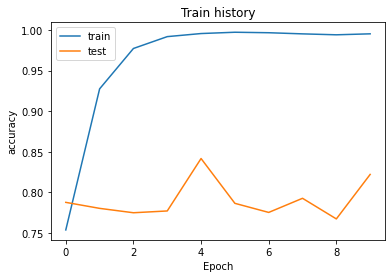

In [17]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

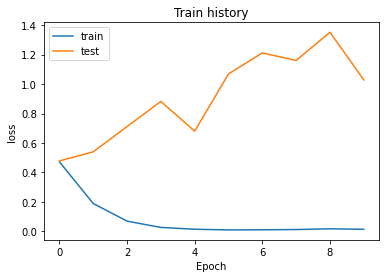

In [18]:
show_train_history(train_history, 'loss', 'val_loss')

In [19]:
x_test_sequence = np.array(x_test_sequence)
y_test=np.array(y_test)
scores = model.evaluate(x_test_sequence, y_test, verbose=1)
print()
print('accuracy = ', scores[1])

782/782 [==============================] - 4s 5ms/step - loss: 0.8139 - accuracy: 0.8471

accuracy =  0.8470799922943115


In [20]:
predict=model.predict_classes(x_test_sequence)
print(predict[:20])
predict_classes = predict.reshape(-1)
print(predict_classes[:20])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [21]:
Sentiment_Dict={0:'負面的', 1:'正面的'}
def display_test_sentiment(i):
    print(x_test[i])
    print('標籤label: ', Sentiment_Dict[y_test[i]])
    print('預測結果: ', Sentiment_Dict[predict_classes[i]])

In [22]:
display_test_sentiment(2)

As a recreational golfer with some knowledge of the sport's history, I was pleased with Disney's sensitivity to the issues of class in golf in the early twentieth century. The movie depicted well the psychological battles that Harry Vardon fought within himself, from his childhood trauma of being evicted to his own inability to break that glass ceiling that prevents him from being accepted as an equal in English golf society. Likewise, the young Ouimet goes through his own class struggles, being a mere caddie in the eyes of the upper crust Americans who scoff at his attempts to rise above his standing. What I loved best, however, is how this theme of class is manifested in the characters of Ouimet's parents. His father is a working-class drone who sees the value of hard work but is intimidated by the upper class; his mother, however, recognizes her son's talent and desire and encourages him to pursue his dream of competing against those who think he is inferior.Finally, the golf scenes

In [23]:
display_test_sentiment(12502)

First of all I hate those moronic rappers, who could'nt act if they had a gun pressed against their foreheads. All they do is curse and shoot each other and acting like cliché'e version of gangsters.The movie doesn't take more than five minutes to explain what is going on before we're already at the warehouse There is not a single sympathetic character in this movie, except for the homeless guy, who is also the only one with half a brain.Bill Paxton and William Sadler are both hill billies and Sadlers character is just as much a villain as the gangsters. I did'nt like him right from the start.The movie is filled with pointless violence and Walter Hills specialty: people falling through windows with glass flying everywhere. There is pretty much no plot and it is a big problem when you root for no-one. Everybody dies, except from Paxton and the homeless guy and everybody get what they deserve.The only two black people that can act is the homeless guy and the junkie but they're actors by 

In [24]:
input_text='''When you take on a classic like Beauty and the Beast for a live action movie which was also nominated for the Best Picture by the Academy you HAVE to make sure that the spirit of the original remains intact even if you can't make it as good. I know that one has to tweak a few little things to make it appropriate not just for the new generation but also as a live action movie though without making it look cheesy or over the top... which quite sadly was not the case with this one... it was directed by an Oscar winning director (who also directed a twilight movie which sucks) and a studio that has recently produced better than the original adaptation of the jungle book which I really love... so one wonders what must have gone wrong... that I think we will find out later but for now if I have to say something positive about this movie it would be its visual effects which were quite gorgeous if not entirely believable, the design of the CGI characters which were a reminiscence of the original ones, Belle played by Emma Watson though not as great as I wanted her to be, seems to have done her job. And even if the songs didn't flow as greatly with the story as it did before, you could still enjoy them. The choreography, set design and the costumes also stole the show along with the Humour because of its talented cast even if it seemed a little cheesy at places, it managed to make me laugh (especially Gaston) hence making it a better movie than it really was... I will give it a 7/10...

P.S.- You may enjoy it because of the nostalgia factor'''

input_sequence = token.texts_to_sequences([input_text])
print(input_sequence)
print(len(input_sequence[0]))

[[50, 21, 189, 19, 3, 352, 36, 931, 2, 1, 2772, 14, 3, 408, 202, 16, 59, 12, 77, 2293, 14, 1, 114, 427, 30, 1, 1800, 21, 24, 5, 93, 248, 11, 1, 1098, 4, 1, 200, 1285, 56, 44, 21, 187, 93, 8, 13, 48, 9, 120, 11, 27, 43, 5, 3, 167, 113, 179, 5, 93, 8, 2310, 20, 39, 14, 1, 157, 2235, 17, 77, 13, 3, 408, 202, 16, 147, 205, 227, 8, 164, 949, 38, 116, 1, 346, 59, 175, 1032, 12, 20, 1, 417, 15, 10, 27, 8, 12, 522, 30, 31, 729, 1569, 163, 33, 77, 522, 3, 16, 59, 1872, 2, 3, 1177, 11, 43, 1028, 1052, 124, 70, 1, 200, 1252, 4, 1, 2685, 270, 59, 9, 62, 115, 34, 27, 3576, 47, 211, 24, 820, 351, 11, 9, 100, 71, 76, 165, 42, 298, 17, 14, 146, 44, 9, 24, 5, 131, 138, 1119, 40, 10, 16, 8, 58, 25, 90, 1109, 297, 59, 67, 175, 1488, 44, 20, 1090, 860, 1, 1590, 4, 1, 1679, 101, 59, 67, 3, 4, 1, 200, 661, 252, 30, 2637, 147, 20, 13, 84, 13, 9, 469, 37, 5, 25, 182, 5, 24, 220, 37, 288, 2, 56, 44, 1, 686, 156, 2962, 13, 3051, 15, 1, 61, 13, 8, 118, 154, 21, 96, 127, 353, 94, 1, 266, 1590, 2, 1, 1346, 77, 1, 

In [27]:
pad_input_sequence = sequence.pad_sequences(input_sequence, maxlen=380)
print(pad_input_sequence)
print(len(pad_input_sequence[0]))

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0   50   21  189   19
     3  352   36  931    2    1 2772   14    3  408  202   16   59   12
    77 2293   14    1  114  427   30    1 1800   21   24    5   93  248
    11    1 1098    4    1  200 1285   56   44   21  187   93    8   13
    48    9  120   11   27   43    5    3  167  113  179    5   93    8
  2310   20   39   14    1  157 2235   17   77   13    3  408  202   16
   147  205  227    8  164  949   38  116    1  346   59  175 1032   12
    20    1  417   15   10   27    8   12  522   30   31  729 15

In [28]:
predict_result=model.predict_classes(pad_input_sequence)
predict_result
predict_result[0][0]
Sentiment_Dict[predict_result[0][0]]

'負面的'

In [29]:
input_text='''Fallen in Love with this outstanding movie... A gentle beast'''

input_sequence = token.texts_to_sequences([input_text])
print(input_sequence)
print(len(input_sequence[0]))

[[2904, 7, 115, 15, 10, 1337, 16, 3, 3798, 2772]]
10


In [31]:
pad_input_sequence = sequence.pad_sequences(input_sequence, maxlen=380)
print(pad_input_sequence)
print(len(pad_input_sequence[0]))

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [32]:
predict_result=model.predict_classes(pad_input_sequence)
predict_result
predict_result[0][0]
Sentiment_Dict[predict_result[0][0]]

'正面的'